In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Training Dataset.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
len(data['Loan_ID'].unique())

614

In [ ]:
data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
cat_cols = [feature for feature in data.columns if data[feature].dtype=='O']
num_cols = [feature for feature in data.columns if data[feature].dtype!='O']
print(len(cat_cols))
print(cat_cols)
print(len(num_cols))
print(num_cols)

7
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
5
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


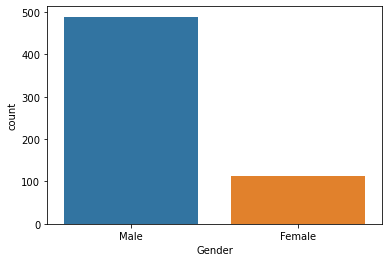

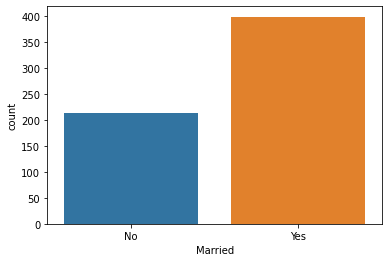

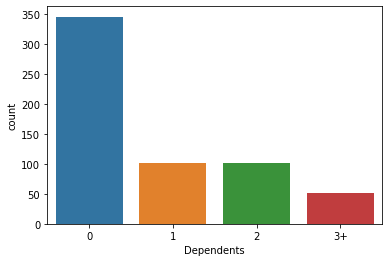

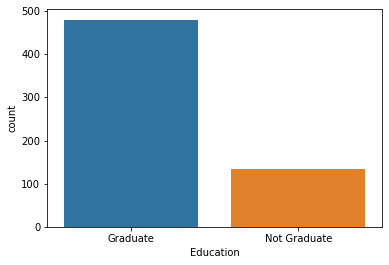

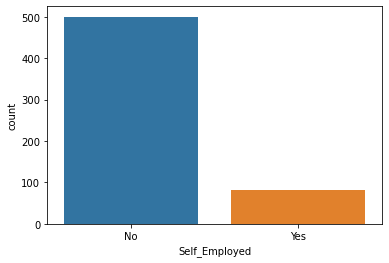

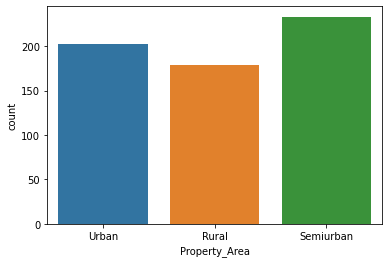

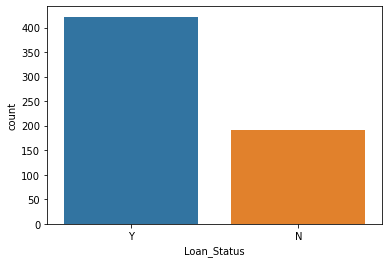

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in cat_cols:
    sns.countplot(data[i])
    plt.show()

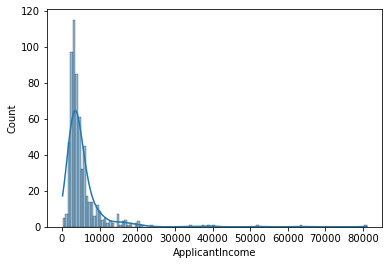

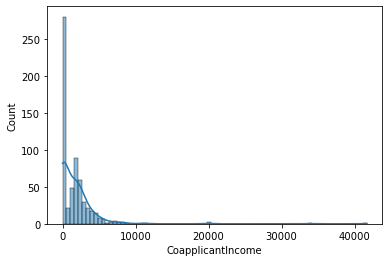

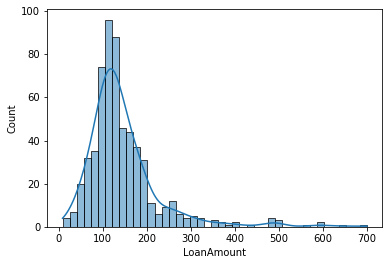

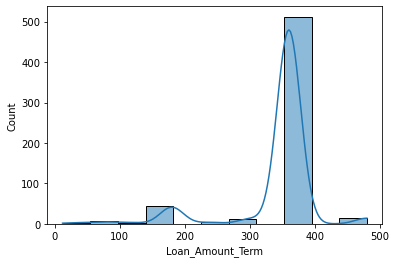

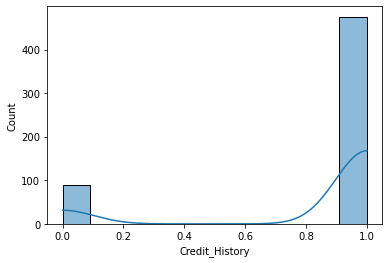

In [ ]:
for i in num_cols:
    sns.histplot(data[i],kde=True)
    plt.show()

In [ ]:
d1 = data.groupby(['Gender','Married'])['Loan_Status'].count().reset_index()

In [ ]:
d1

,Gender,Married,Loan_Status
0,Female,No,80
1,Female,Yes,31
2,Male,No,130
3,Male,Yes,357


<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

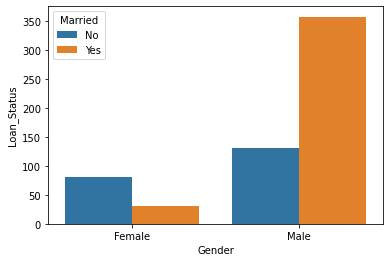

In [ ]:
sns.barplot(data=d1,x=d1['Gender'],y=d1['Loan_Status'],hue='Married')

In [ ]:
d2 = data.groupby(['Married','Dependents'])['Loan_Status'].size().reset_index()
d2

,Married,Dependents,Loan_Status
0,No,0,171
1,No,1,23
2,No,2,8
3,No,3+,7
4,Yes,0,174
5,Yes,1,79
6,Yes,2,93
7,Yes,3+,44


<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

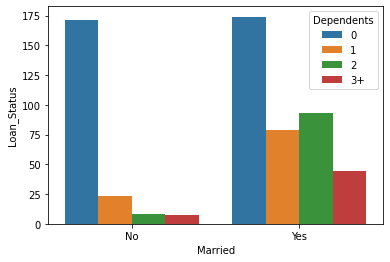

In [ ]:
sns.barplot(data=d2,x=d2['Married'],y=d2['Loan_Status'],hue='Dependents')

In [ ]:
d3 = data.groupby(['Gender','Education'])['Loan_Status'].size().reset_index()

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

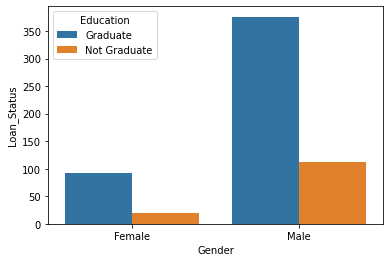

In [ ]:
sns.barplot(data=d3,x=d3['Gender'],y=d3['Loan_Status'],hue='Education')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

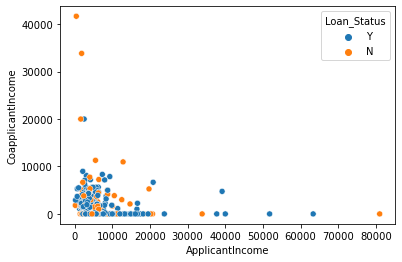

In [ ]:
sns.scatterplot(data=data,x=data['ApplicantIncome'],y=data['CoapplicantIncome'],hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

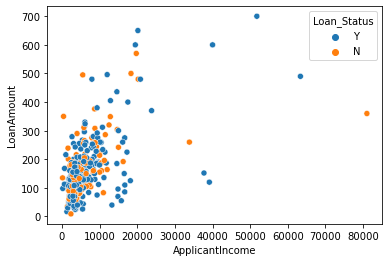

In [ ]:
sns.scatterplot(data=data,x=data['ApplicantIncome'],y=data['LoanAmount'],hue='Loan_Status')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(data['Loan_Status'])

In [ ]:
filename = 'label.pkl'
with open(filename, 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
x=data.drop('Loan_Status',axis=1)


In [ ]:
num_columns=x.columns[x.dtypes!='object']
cat_columns=x.columns[x.dtypes=='object']

In [ ]:
print(len(num_columns))
print(num_columns)
print(len(cat_columns))
print(cat_columns)

5
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
6
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipe=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]
)
cat_pipe=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('transformer',OneHotEncoder(categories='auto'))
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipe,num_columns),
('cat_pipeline',cat_pipe,cat_columns)
])

In [ ]:
preprocessor.fit(data)
data_preprocessed = pd.DataFrame(preprocessor.transform(data),
                                    columns=preprocessor.transformers_[0][2].tolist() +
                                             preprocessor.named_transformers_['cat_pipeline'].named_steps['transformer'].get_feature_names_out(cat_columns).tolist())

In [ ]:
data_preprocessed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,0.273231,0.411733,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.437174,-0.472404,1.276168,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.357064,-0.554487,0.490816,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_preprocessed,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
y_pred = model.predict(x_test)

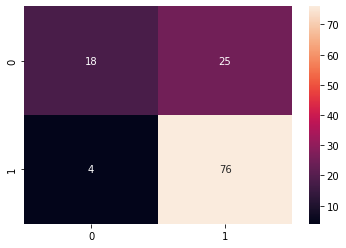

0.7642276422764228


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()
print(acc)

In [ ]:
res = model.predict([[0.072991,-0.554487,-0.211241,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0]])

In [ ]:
filename = 'label.pkl'
with open(filename, 'rb') as file:
    label_encoder = pickle.load(file)

In [ ]:
label_encoder.inverse_transform(res)[0]

'Y'